# Polecenia do zadań


**Ważne jest, aby zadania były wykonywane po kolei, zgodnie z ustaloną kolejnością.**

Baza MNIST jest tak zwanym "hello world" dla ML. Jest to zbiór ręcznie pisanych cyfr wykorzystywany do treningu różnych systemów ML. Jest to problem wieloklasowego klasyfikatora - rozpoznawanie cyfr 0, 1, ..., 9.

Baza składa się z 60k obrazów treningowych (skala szarości 28x28 pikseli) i 10k obrazów testowych.


## Przygotowanie do zadań

Uruchom poniższy kod, aby zaimportować odpowiednie biblioteki, nasz dataset do trenowania oraz testowania

In [ ]:
import tensorflow as tf
from tensorflow import keras

# import MNIST dataset and rescale the images from [0,255] to the [0.0,1.0] range
(x_train, y_train), (x_valid, y_valid) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255       # 784 = 28*28
x_valid = x_valid.reshape(10000, 784).astype('float32') / 255

print('x_train size: ' + str(x_train.shape))
print('x_valid size: ' + str(x_valid.shape))

x_train size: (60000, 784)
x_valid size: (10000, 784)


Jeżeli chodzi o zastosowanie metody **reshape()** to musimy przekonwertować dwuwymiarowe dane wejściowe na format jednowymiarowy, aby wprowadzić je do modelu. Osiąga się to w procesie zwanym spłaszczaniem. W tym procesie obraz siatki 28x28 jest konwertowany na jednowymiarową tablicę 784(28x28)

## Wyświetlenie przykładowych danych

Uruchom kod w celu wyświtlenia przykładowych danych

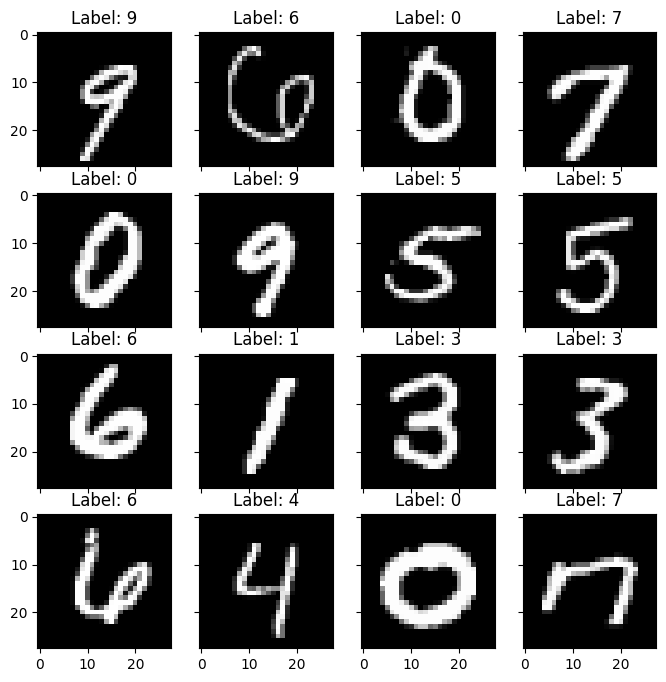

In [ ]:
import matplotlib.pyplot as plt
import random

def plot_mnist(images, labels):
    fig, ax = plt.subplots(4, 4, figsize=(8, 8), sharex='col', sharey='row')
    for x in range(4):
        for y in range(4):
            idx = random.randint(0, images.shape[0]-1)
            img = images[idx].reshape(28, 28)
            truth = labels[idx]
            ax[x,y].imshow(img, cmap='gray')
            ax[x,y].set_title("Label: " + str(truth))

plot_mnist(x_train, y_train)

# Zadanie 1
### Tworzenie modelu z wykorzystaniem prostej sieci sekwencyjnej
Postaraj się rozwiązać problem za pomocą zwykłej sieci sekwencyjnej. Wykorzystująć model MLP (Multi Layer Perceptron) tzn. **model bez warstw splotowych (Conv2D oraz MaxPooling2D)**.

Utwórz obiekt **Sequential** (pustą strukturę modelu, do której możemy dodawać kolejne warstwy)

Dodaj 3 warstwy:
* **Dense** (ustaw liczbę neuronów na np. 256, funkcje aktywacji - activation na relu oraz input_shape na (784,)
* **Dense** (ustaw liczbę neuronów na np. 128 oraz funkcje aktywacji - activation na relu)
* **Dense** (ustaw liczbę neuronów na (**zastanów się i wpisz odpowiednią**) oraz funkcje aktywacji - activation na (**zastanów się i wpisz odpowiednią**))

Aby wyświetlić podsumowanie użyj ```model.summary()```


Napisz kod, który  skompiluje model przy użyciu optymalizatora **'adam'**, funkcji straty **'sparse_categorical_crossentropy'** oraz metryki **'accuracy'**

Następnie napisz kod, który wytrenuje nasz model na podstawie dostarczonych danych treningowych. Na wejście modelu dodaj **'x_train'**, jako kolejny argument podaj zbiór **etykiet** oraz dowolnie ustaw **liczbę epok** (proponuje np. 2-3 - aby nie tracić za dużo czasu).

Na końcu sprawdź swój model na zbiorze testowym używająć ```model.evalutate```

**Jeżeli uzyskałeś dokładność na poziomie >90% to GRATULUJĘ!**

# Zadanie 2

Postaraj się rozwiązać ten sam problem za pomocą prostej **konwolucyjnej sieci neuronowej (CNN)**. W tym celu zmodyfikuj strukturę swojego poprzedniego modelu o dodatkowe warstwy m.in Conv2D oraz MaxPooling2D.

Zastosuj przykładowo 3 warstwy Conv2D (ustawiająć liczbę filtrów kolejno np. 9,12,15; kernel size (3,3) oraz odpowiednią funkcje aktywacji). Dodatkowo dwa razy naprzemiennie z warstwą Conv2D zastosuj warstwę MaxPool2D (ustawiająć pool_size (2,2). Następnie zastosuj warstwę Flatten oraz dwie warstwy Dense (z odpowiednią liczbą neuronów i odpowiednią funkcja aktywacji).

**Pamiętaj o zdefiniowaniu input shape w 1 warstwie! (Jako 3 argument możemy podac 1 - nasze obrazki są szare)**

Nastepnie analogicznie jak do poprzedniego zadania, skompiluj, wytrenuj oraz przetestuj na zbiorze walidacyjnym nasz model.



---


***Przykład, który został użyty do demonstracji, czyli uczenie na zbiorze MNIST w TensorFlow, może nie uwidaczniać pełnego potencjału sieci CNN w porównaniu do zwykłej sieci MLP. Zbiór MNIST zawiera obrazy o niskiej rozdzielczości (28x28 pikseli) i jednoznacznie reprezentujących cyfry. W takim przypadku nawet zwykła sieć MLP może osiągnąć wysoką dokładność klasyfikacji.***

# 3. zrób lepszy model (opcjonalne)

Spróbuj zmodyfikować model tak aby uzyskać dokładność na zbiorze walidacyjnym na poziomie **0.98%+**.

Kilka pomysłów:

* zmień liczbę filtrów
* zwiększ liczbę warstw splotowych
* wykonaj więcej epok treningowych
* dodaj regularyzację (przeciwdziałanie przeuczeniu) np. warstwy Dropout()
* zwiększ liczbę warstw decyzyjnych + dodaj neuronów

# 4. Poziom błędów:

Rezultaty SOTA (poziom błędów):

* 7.6 % prosty klasyfikator liniowy
* 3.3 % nieliniowy klasyfikator z PCA
* 0.56% SVM
* 1.6% MLP 2-warstwowy
* 0.3% MLP 6 warstw
* 0.25% MLP 13 warstw
* 0.2% human (2/1000 błędów)
* 0.17% CNN 20 warstw